In [74]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv("C:/Users/DELL/Downloads/Online_retail.csv")


In [78]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,United Kingdom


In [80]:
df.drop('Description',axis=1)

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12-01-2010 08:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12-01-2010 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12-01-2010 08:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,581587,22613,12,12-09-2011 12:50,0.85,12680.0,France
541905,581587,22899,6,12-09-2011 12:50,2.10,12680.0,France
541906,581587,23254,4,12-09-2011 12:50,4.15,12680.0,France
541907,581587,23255,4,12-09-2011 12:50,4.15,12680.0,France


In [82]:
df.columns.tolist()

['InvoiceNo',
 'StockCode',
 'Description',
 'Quantity',
 'InvoiceDate',
 'UnitPrice',
 'CustomerID',
 'Country']

In [84]:
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])
df['StockCode']=le.fit_transform(df['StockCode'])

In [86]:
X = df[['Quantity', 'UnitPrice']] 


In [88]:
# 4️⃣ Standardize the data (important for K-Means)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [90]:
# 5️⃣ Find the optimal number of clusters using the Elbow Method
inertia = []
K = range(1, 11)
for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(X_scaled)
    inertia.append(model.inertia_)

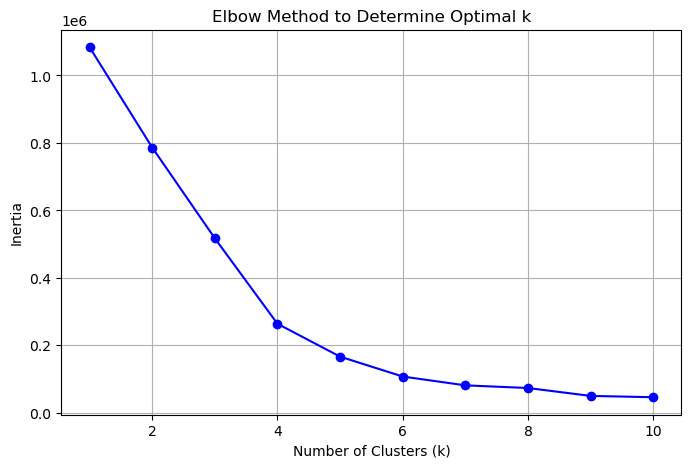

In [92]:
# Plot elbow curve
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method to Determine Optimal k')
plt.grid(True)
plt.show()

In [106]:
# 6️⃣ Fit KMeans with optimal cluster (usually 5 for this dataset)
kmeans = KMeans(n_clusters=15, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

# 7️⃣ View cluster summary
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print(cluster_summary)

           StockCode      Quantity     UnitPrice    CustomerID    Country
Cluster                                                                  
0        1648.978885      6.330851      3.536955  15291.338041  34.325068
1        4037.166667     -0.333333  12791.223333           NaN  36.000000
2        2283.000000 -77605.000000      1.560000  14396.000000  36.000000
3        2283.000000  77605.000000      1.560000  14396.000000  36.000000
4        4060.000000     -1.000000  38970.000000  15098.000000  36.000000
5        4051.823529     -0.352941   4196.452941  14405.555556  31.235294
6        2417.333333  -7969.333333      0.005000  15838.000000  36.000000
7        4038.000000      1.000000 -11062.060000           NaN  36.000000
8        3947.831650      0.595960    520.701380  14330.782609  33.626263
9        4037.000000     -1.000000  17059.396667           NaN  36.000000
10       1526.266234    720.605519      1.103474  15877.518581  33.803571
11       4058.764706      0.235294   1

In [98]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Cluster
0,536365,3536,WHITE HANGING HEART T-LIGHT HOLDER,6,12-01-2010 08:26,2.55,17850.0,36,0
1,536365,2794,WHITE METAL LANTERN,6,12-01-2010 08:26,3.39,17850.0,36,0
2,536365,3044,CREAM CUPID HEARTS COAT HANGER,8,12-01-2010 08:26,2.75,17850.0,36,0
3,536365,2985,KNITTED UNION FLAG HOT WATER BOTTLE,6,12-01-2010 08:26,3.39,17850.0,36,0
4,536365,2984,RED WOOLLY HOTTIE WHITE HEART.,6,12-01-2010 08:26,3.39,17850.0,36,0
5,536365,1662,SET 7 BABUSHKA NESTING BOXES,2,12-01-2010 08:26,7.65,17850.0,36,0
6,536365,800,GLASS STAR FROSTED T-LIGHT HOLDER,6,12-01-2010 08:26,4.25,17850.0,36,0
7,536366,1547,HAND WARMER UNION JACK,6,12-01-2010 08:28,1.85,17850.0,36,0
8,536366,1546,HAND WARMER RED POLKA DOT,6,12-01-2010 08:28,1.85,17850.0,36,0
9,536367,3305,ASSORTED COLOUR BIRD ORNAMENT,32,12-01-2010 08:34,1.69,13047.0,36,0


In [110]:

df.to_excel("C:/Users/DELL/Downloads/OnlineRetail_cluster.xlsx", index=False)




In [112]:
print(f"\n✅ Clustering complete! Results saved to:\n{output_path}")


✅ Clustering complete! Results saved to:
C:/Users/DELL/Downloads/OnlineRetail_cluster.xlsx
